# Import the necessary libraries

In [2]:
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns
import logging
import pandas as pd
 
# Configure logging
logging.basicConfig(filename='../logs/',
                    level=logging.INFO,
                    format='%(asctime)s:%(levelname)s:%(message)s')
  

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../scripts')))
from load_csv_data import Load_CSV_Data
from missing_values_handler import handle_missing_values
from data_cleaning import clean_data
from eda import eda_univariate, eda_bivariate


# Load data

In [3]:
df = Load_CSV_Data('../data/Fraud_Data.csv')
df.load_csv_data()
df = df.get_data()

Data successfully loaded from ../data/Fraud_Data.csv


In [4]:
df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


# Data analysis and preprocessing

### Handle missing value

In [5]:
# 1. Handle Missing Values
print("Missing Values Before Handling:")
print(df.isnull().sum())

df_cleaned = handle_missing_values(df)

print("Missing Values After Handling:")
print(df_cleaned.isnull().sum())

Missing Values Before Handling:
user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64
Columns with missing values: []
Missing value counts:
Series([], dtype: float64)

Missing Values After Handling:
user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64


### Clean data

In [6]:
# 2. Clean the Data
df_cleaned = clean_data(df_cleaned)

# Display the cleaned data
df_cleaned.head()

Removed 0 duplicate rows.


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


# EDA

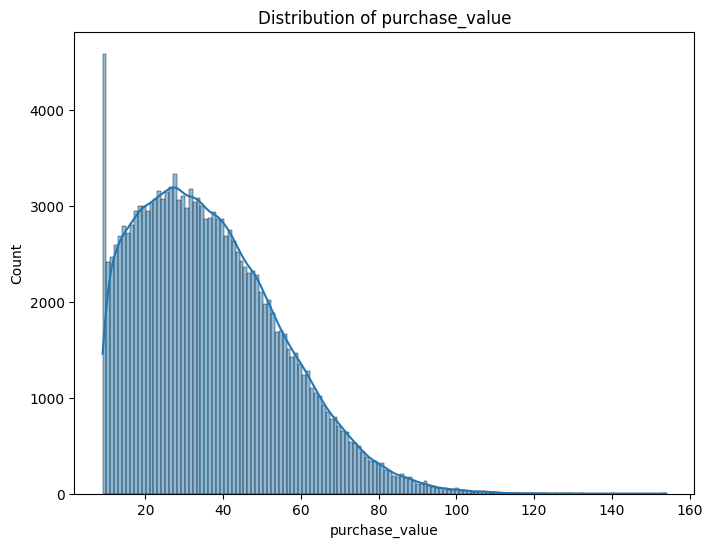

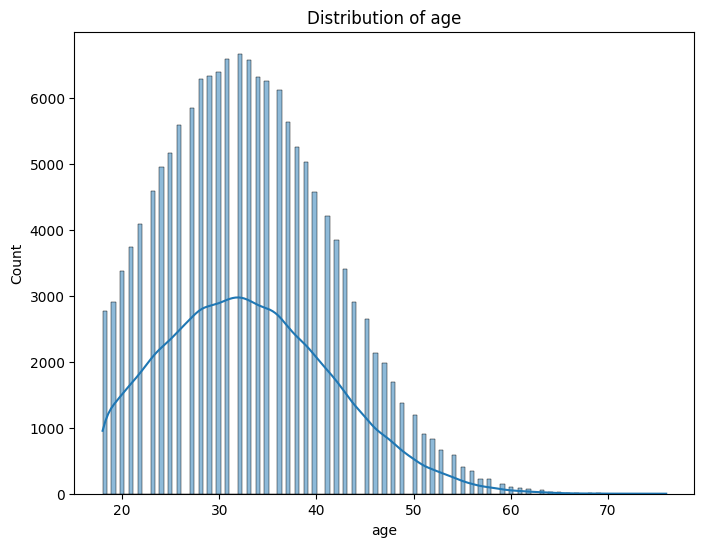

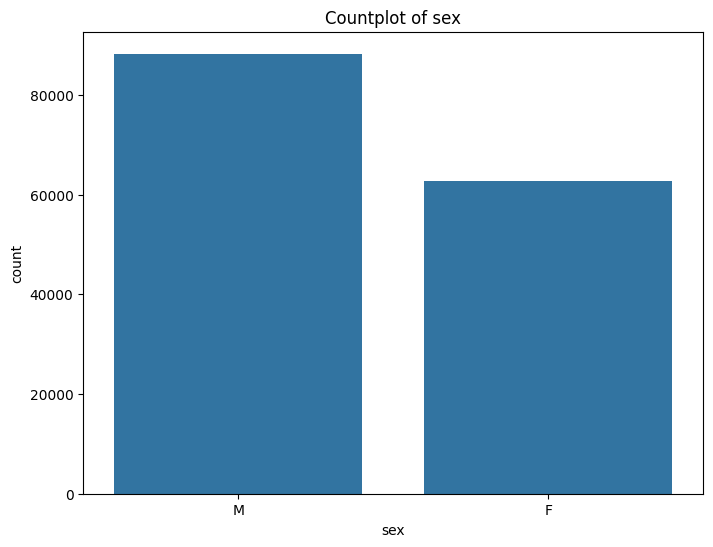

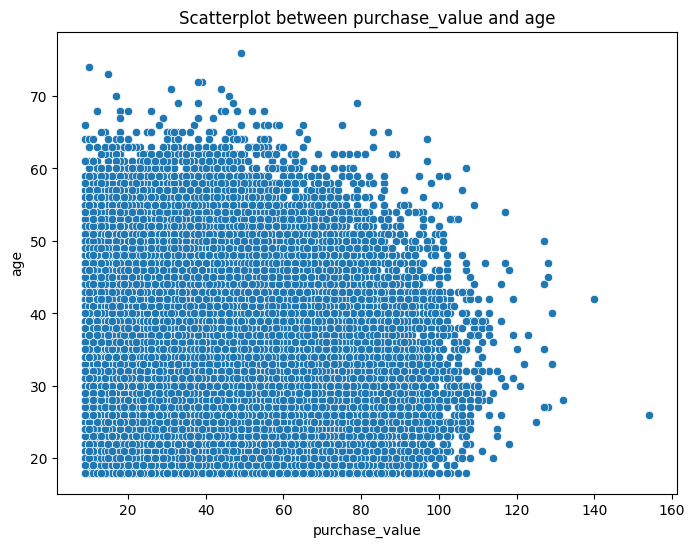

In [7]:
# 3. Perform Univariate Analysis
eda_univariate(df_cleaned, columns=['purchase_value', 'age', 'sex'])

# 4. Perform Bivariate Analysis
eda_bivariate(df_cleaned, 'purchase_value', 'age')

In [8]:
# Save the cleaned  data
df_cleaned.to_csv("../data/cleaned_fraud_data.csv", index=False)
print("Cleaned data saved as 'cleaned_fraud_data.csv'")

Cleaned data saved as 'cleaned_fraud_data.csv'
